# Magnetic Survey of an archeological site
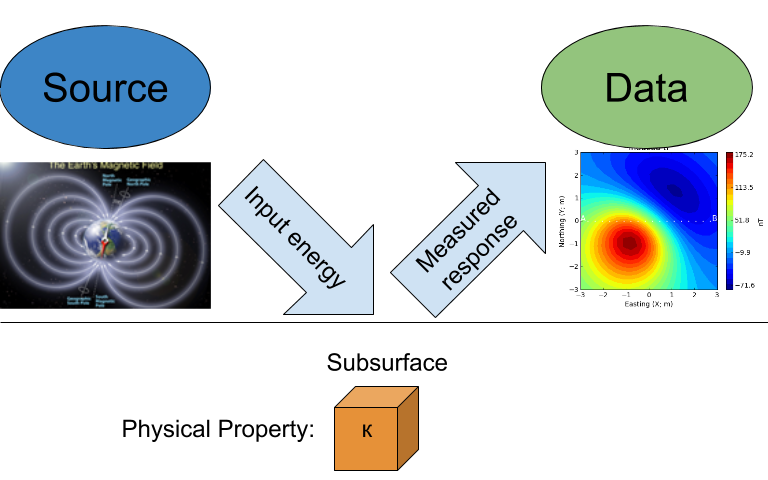
Image credit: Geophysics for Practicing Geoscientists

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the vertical component of the anomaly

In [ ]:
def dipole_vertical_anomaly(x, y, x0, y0, z0, m):
    """
    Compute the vertical component of the magnetic field anomaly 
    at (x, y) from a single vertical dipole located at (x0, y0, -z0).

    Parameters
    ----------
    x, y : float or array
        Coordinates of the observation point(s).
    x0, y0 : float
        Horizontal coordinates of the dipole center.
    z0 : float
        Positive depth (below the surface) of the dipole center.
    m : float
        Dipole moment strength (assumed vertical).
    
    Returns
    -------
    Bz : float or array
        Vertical component of the magnetic field anomaly at (x, y).
    """
    # Offsets in each horizontal direction
    dx = x - x0
    dy = y - y0
    
    # Squared distances
    r2 = dx**2 + dy**2 + z0**2
    
    # Dipole formula for vertical component
    # Bz = (mu_0/(4*pi)) * m * (2z^2 - x^2 - y^2) / r^(5/2)
    # We'll define mu0/(4*pi) as a constant for convenience
    C = 1e-7  # mu_0 / (4*pi) in SI, if m is in A·m^2 and distances in meters
    
    Bz = C * m * (2 * z0**2 - dx**2 - dy**2) / (r2**(2.5))
    
    return Bz



## 2. Create synthetic data

In [ ]:
def synthetic_magnetic_survey(
    nx=50, ny=50, dx=10.0, dy=10.0, 
    n_anomalies=5, 
    B0=50000.0, 
    seed=42
):
    """
    Create a synthetic magnetic survey on a 2D grid with randomly placed dipole sources.
    
    Parameters
    ----------
    nx, ny : int
        Number of grid points in x and y direction.
    dx, dy : float
        Spacing of grid in x and y direction.
    n_anomalies : int
        Number of random dipole anomalies to generate.
    B0 : float
        Background Earth's field magnitude (nT or any consistent unit).
        We don't explicitly use B0 in the dipole model here, but you could 
        scale each dipole moment by B0 if desired.
    seed : int
        Random seed for reproducibility.
        
    Returns
    -------
    X, Y : 2D arrays of shape (ny, nx)
        Meshgrid coordinates for plotting.
    anomaly_grid : 2D array of shape (ny, nx)
        The total vertical magnetic anomaly due to all dipoles.
    B_total : 2D array of shape (ny, nx)
        The total field = background B0 + anomaly_grid.
    dipole_params : list of tuples
        The random dipole parameters (x0, y0, z0, m) for reference.
    """
    np.random.seed(seed)
    
    # ---- 1) Create grid coordinates
    x_vals = np.arange(nx) * dx
    y_vals = np.arange(ny) * dy
    X, Y = np.meshgrid(x_vals, y_vals)
    
    # ---- 2) Generate random dipole anomalies
    # Random horizontal positions within the grid, random depths, random moments
    # Example: bury them between z0=5 and z0=50
    # Example: random moment in [1e4, 1e6] (arbitrary units)
    dipole_params = []
    for i in range(n_anomalies):
        x0 = np.random.uniform(0, (nx-1) * dx)
        y0 = np.random.uniform(0, (ny-1) * dy)
        z0 = np.random.uniform(5, 50)
        m  = np.random.uniform(1e4, 1e6)
        dipole_params.append((x0, y0, z0, m))
    
    # ---- 3) Sum vertical anomaly from each dipole at each grid point
    anomaly_grid = np.zeros_like(X, dtype=float)
    for (x0, y0, z0, m) in dipole_params:
        anomaly_grid += dipole_vertical_anomaly(X, Y, x0, y0, z0, m)
    
    # ---- 4) (Optional) Add the uniform background field
    # If you measure total field, you might do:
    B_total = B0 + anomaly_grid
    
    return X, Y, anomaly_grid, B_total, dipole_params

## 3. Run the code

Dipole parameters (x0, y0, z0, m):
  Anomaly #1: (341.2699009429522, 140.20827412568593, 15.20831541038914, 555801.6213920623)
  Anomaly #2: (352.5397951949259, 207.32216546098587, 49.1343889273077, 687981.4411990147)
  Anomaly #3: (235.65663172733684, 192.13758391513375, 20.443010726789122, 731759.2103102012)
  Anomaly #4: (214.90039989301596, 29.24216933868849, 22.911991489869415, 740615.4516747154)
  Anomaly #5: (89.42094792221499, 85.97136051227135, 28.91981182288273, 536509.3112258974)
  Anomaly #6: (310.8564696901473, 416.2215790981169, 37.60048961872859, 614913.275570807)
  Anomaly #7: (353.99725745940856, 158.24986778805732, 21.280489503004134, 235980.59857016607)
  Anomaly #8: (143.91988273052638, 309.178300688699, 9.144722297528382, 439364.16095273296)
  Anomaly #9: (211.12275403152546, 241.90569784865005, 24.16236306331226, 319138.6107427406)
  Anomaly #10: (208.91214041177602, 437.7606899273961, 47.48720081917458, 506818.30912549316)


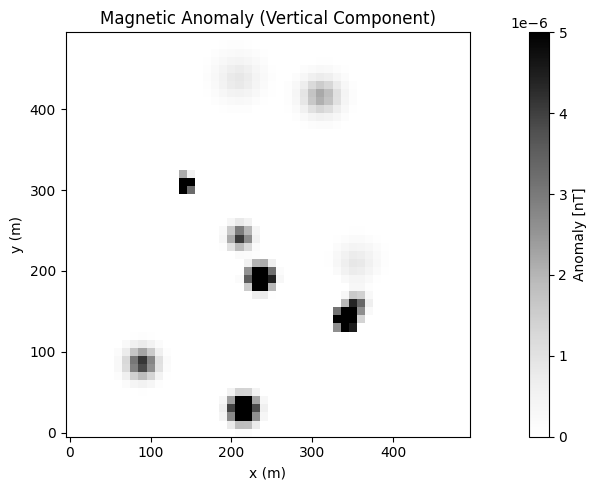

In [18]:

# Example usage
# ---------------------
nx, ny = 50, 50         # Grid points
dx, dy = 10.0, 10.0     # Spacing in meters
n_anomalies = 10        # Number of synthetic dipoles
B0 = 50000.0            # Earth's background field (e.g. in nT)

X, Y, anomaly_grid, B_total, dipoles = synthetic_magnetic_survey(
    nx=nx, ny=ny, dx=dx, dy=dy, 
    n_anomalies=n_anomalies, B0=B0, seed=123
)

print("Dipole parameters (x0, y0, z0, m):")
for i, d in enumerate(dipoles):
    print(f"  Anomaly #{i+1}: {d}")

# Plot the results
fig, ax = plt.subplots(figsize=(12, 5))

im0 = ax.pcolormesh(X, Y, anomaly_grid, shading='auto', cmap='Greys',vmin=0,vmax=5e-6)
ax.set_title("Magnetic Anomaly (Vertical Component)")
ax.set_aspect('equal')
plt.colorbar(im0, ax=ax, label="Anomaly [nT]")

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

plt.tight_layout()
plt.show()
